In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Probability of two fair coin flips that produce exactly two heads


In [214]:
all_cas = np.random.randint(2, size=(10000,2))
two_head = all_cas[(all_cas[:,0] == 1) & (all_cas[:,1] == 1)] 

In [215]:
two_head.shape

(2521, 2)

In [216]:
two_head_prob = two_head.shape[0]/all_cas.shape[0]
two_head_prob

0.2521

## Three fair coin flips produce exactly one head


In [217]:
ph = np.random.randint(2, size=100000).sum()/100000
pt = np.random.randint(2, size=100000).sum()/100000

one_head = 3*ph*pt*pt
print(one_head)


0.3753428811657


## Three biased coin flips with P(H) = 0.6 produce exactly one head

In [218]:
ph = np.random.choice(2, size=100000, p=[0.4,0.6]).sum()/100000
pt = 1 - ph

one_head = 3*ph*pt*pt # Look at this! it is the binomial probability!
print(one_head)


0.288326330522088


## A die rolls an even number


In [219]:
all_cas = np.random.randint(1, 7, size=10000)
filt = all_cas[all_cas%2 == 0]

p_even = all_cas[filt].shape[0]/all_cas.shape[0]
p_even

0.4955

In [220]:
all_cas.shape[0]

10000

## Two dice roll a double


In [221]:
all_cas = np.random.randint(1, 7, size=(10000, 2))
filt = all_cas[all_cas[:,0] == all_cas[:,1]]

p_double = all_cas[filt].shape[0]/all_cas.shape[0]
p_double

0.1658

## A fair coin flip produces heads(binomial)

In [222]:
np.random.binomial(1, 0.5, size=10000).mean()

0.5018

## Five fair coin flips produce exactly one head

In [223]:
(np.random.binomial(5, 0.5, size=10000) == 1).mean()

0.1555

## Ten fair coin flips produce exactly four heads

In [226]:
(np.random.binomial(10, 0.5, size=10000) == 4).mean()

0.2058

## Five biased coin flips with P(H) = 0.8 produce exactly five heads


In [227]:
(np.random.binomial(5, 0.8, size=10000) == 5).mean()

0.3274

## Ten biased coin flips with P(H) = 0.15 produce exactly three heads


In [53]:
(np.random.binomial(10, 0.15, size=10000) == 3).mean()

0.1323

# Cancer Test Results


In [228]:
cancer_df = pd.read_csv('./cancer_test_data.csv')
cancer_df.head()

,patient_id,test_result,has_cancer
0,79452,Negative,False
1,81667,Positive,True
2,76297,Negative,False
3,36593,Negative,False
4,53717,Negative,False


In [122]:
# How many patients are there in total?

num_patient = cancer_df.shape[0]
num_patient

2914

In [109]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 3 columns):
patient_id     2914 non-null int64
test_result    2914 non-null object
has_cancer     2914 non-null bool
dtypes: bool(1), int64(1), object(1)
memory usage: 48.5+ KB


In [114]:
cancer_df.has_cancer.map({True:1, False:0})

0       0
1       1
2       0
3       0
4       0
       ..
2909    0
2910    0
2911    0
2912    0
2913    0
Name: has_cancer, Length: 2914, dtype: int64

In [129]:
# How many patients have cancer?

cancer = cancer_df[cancer_df['has_cancer'] == 1]
print(cancer.shape)

(306, 3)


In [130]:
# How many patients do not have cancer?

non_cancer = cancer_df[cancer_df['has_cancer'] == 0]
print(non_cancer.shape)

(2608, 3)


In [131]:
# What proportion of patients have cancer?

prop = cancer.shape[0]/num_patient
prop

0.10501029512697323

In [132]:
# What proportion of patients don't have cancer?

prop = non_cancer.shape[0]/num_patient
prop

0.8949897048730268

In [136]:
# What proportion of patients with cancer test positive?

prop = (cancer.test_result == 'Positive').mean()
prop

0.9052287581699346

In [137]:
# What proportion of patients with cancer test negative?

prop = (cancer.test_result == 'Negative').mean()
prop

0.09477124183006536

In [138]:
# What proportion of patients without cancer test positive?

prop = (non_cancer.test_result == 'Positive').mean()
prop

0.2036042944785276

In [140]:
# What proportion of patients without cancer test negative?

prop = (non_cancer.test_result == 'Negative').mean()
prop

0.7963957055214724

In [146]:
# Probability a patient who tested positive has cancer, or P(cancer|positive)

positive = cancer_df[cancer_df['test_result'] == 'Positive']

prop = (positive.has_cancer == True).mean()
print(prop)

# Lets calculate it from Base rule

p_pc = (cancer.test_result == 'Positive').mean()
pc = cancer.shape[0]/num_patient
pp = positive.shape[0]/num_patient
p_cp = p_pc * pc/pp
print(p_cp)

print("We see a complete consistency between Base formula and our own calculation!")

0.34282178217821785
0.3428217821782178
We see a complete consistency between Base formula and our own calculation!


In [147]:
# Probability a patient who tested positive doesn't have cancer, or P(~cancer|positive)

prop = (positive.has_cancer == False).mean()
print(prop)


0.6571782178217822


In [148]:
# Probability a patient who tested negative has cancer, or P(cancer|negative)

neg = cancer_df[cancer_df['test_result'] == 'Negative']

prop = (neg.has_cancer == True).mean()
print(prop)

0.013770180436847104


In [149]:
# Probability a patient who tested negative doesn't have cancer, or P(~cancer|negative)

prop = (neg.has_cancer == False).mean()
print(prop)

0.9862298195631529


# Sampling Distributions

**Below is an array that represents the students we saw in the previous videos, where 1 represents the students that drink coffee, and 0 represents the students that do not drink coffee.**

In [177]:
students = np.array([1,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1])
students.mean()

0.7142857142857143

In [184]:
sampe = np.random.choice(students, size=5)
sampe.mean()

0.6

In [190]:
np.var(students)

0.20408163265306123

In [205]:
np.random.seed(42)
sample_5 = np.random.choice(students, size=5)
sample_20 = np.random.choice(students, size=20)

print("Variance of 5 sample is %.3f \nVariance of 20 samples is: %.3f" %(sample_5.var(), sample_20.var()))

Variance of 5 sample is 0.160 
Variance of 20 samples is: 0.160


In [187]:
samples = []
for _ in range(10000):
    sample = np.random.choice(students, size=5)
    samples.append(sample.mean())

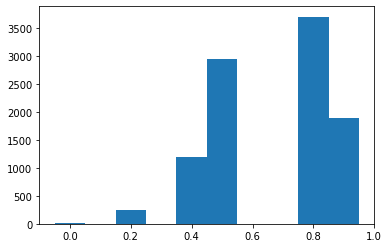

In [229]:
plt.hist(samples, align='left');

In [ ]:
print(np.mean(samples))
print(np.var(samples))
print(np.var(students))

In [230]:
samples_20 = []
for _ in range(10000):
    sample = np.random.choice(students, size=20)
    samples_20.append(sample.mean())

In [231]:
print(np.mean(samples_20))
print(np.var(samples_20))

0.71427
0.0102893671


**The Central Limit Theorem states that with a large enough sample size the sampling distribution of the mean will be normally distributed.**

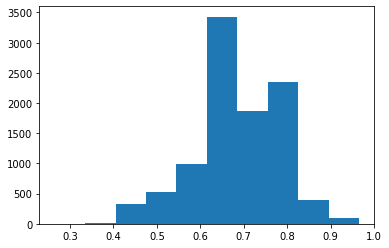

In [232]:
plt.hist(samples_20, align='left');

# Bootstraping

(array([2.000e+00, 1.500e+01, 4.700e+01, 4.240e+02, 6.780e+02, 2.765e+03,
        3.664e+03, 1.299e+03, 1.013e+03, 9.300e+01]),
 array([0.23809524, 0.31428571, 0.39047619, 0.46666667, 0.54285714,
        0.61904762, 0.6952381 , 0.77142857, 0.84761905, 0.92380952,
        1.        ]),
 <a list of 10 Patch objects>)

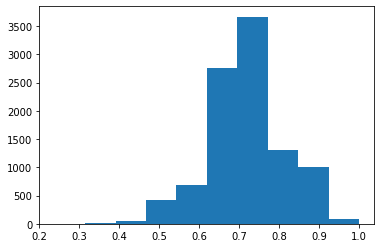

In [234]:
proportion = [np.random.choice(students, 21).mean() for _ in range(10000)]
plt.hist(proportion)